# Homework Python 3

С базовыми фичами языка можно ознакомиться [в теории](01_tt_python.md).

Для закрепления знаний, решите следующие задачи.

# Задание 1. Word Count

Посчитать сколько раз каждое слово повторялось в тексте. Вывести 10 самых частых слов отсортированных по частоте. Игнорировать однобуквенные слова и пунктуацию. Слова в предложении - это наборы символов отделенные друг от друга пробельными символами (пробел, табуляция, новая строка).

**Hint**: вам понадобится `dict` и метод `get(key)`, который возвращает `None`, если значения отсутсвует.

**Advanced**: Нарисуйте bar-plot график количества слов в предложении. (Используйте библиотеку seaborn)

In [21]:
import re

def word_count(text):
    word_list = re.split('[?.,\- \s]', text)
    result = dict()
    for word in word_list:
        if len(word) > 1:
            result[word] = text.count(word)
    result_sorted = sorted(result, key=result.get, reverse=True)
    print(result_sorted[0: 10])
    return result

words_freq = word_count("aa aa aa bb cc cc A B C a AA")
words_freq

['aa', 'cc', 'bb', 'AA']


{'aa': 3, 'bb': 1, 'cc': 2, 'AA': 1}

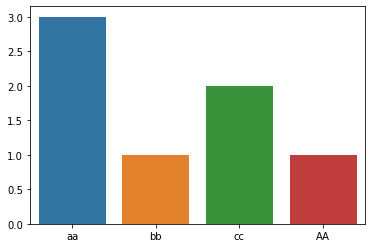

In [22]:
import seaborn as sns

x = list(words_freq.keys())
y = list(words_freq.values())

sns.barplot(x=x, y=y)

In [23]:
# Это магия для ввода текста, не трогайте её
# Выполните эту ячейку и увидите поле для ввода текста. 
# Введите текст, нажмите Enter и получите ответ, который вы вычислили в функции выше
from ipywidgets import widgets
text = widgets.Text(placeholder="тут текст")
display(text)
text.on_submit(lambda txt: word_count(txt.value))

# введите число и нажмите enter

Text(value='', placeholder='тут текст')

# Задание 2. Сумма цифр числа

Посчитать сумму цифр данного натурального числа. Например, `summa(1234) == 1+2+3+4 == 10`.

In [24]:
def summa(n):
    sum_ = 0
    for i in str(n):
        sum_ += int(i)
        
    print(sum_)
    pass

In [25]:
def summa_second(n):
    sum_ = 0
    while(n > 0):
        sum_ += n % 10
        n = n // 10
    print(sum_)
    pass

In [26]:
summa_second(1234)

10


In [27]:
summa(1234)

10


> Человеку свойственна итерация, рекурсия – удел богов. \(James O. Coplien, Bell Labs\)

In [28]:
def summa_recursive(n):
    return n%10 + summa_recursive(n // 10) if n > 9 else n

In [29]:
summa_recursive(1234)

10

# Задание 3. Множество

Это необязательное задание. Но можете сделать для себя, а мы сделаем вам review.

## Теория

Множество - это набор **различных** объектов. Это означает, что в нём нет повторяющихся объектов. `[1,2,3]` - множество, а `[1,2,2,3,1]` - не удовлетворяет определению.

Множество - это абстрактная структура данных и её можно реализовать несколькими способами. Но для начала определим поведения для этой абстракции.

#### Базовые операции:

Этот набор поведений определяет саму абстракцию.

- добавить элемент в множество
- объединить множества
- пересечь множества
- проверка принадлежности элемента множеству

#### Вспомогательные:

Это дополнительные функции. Они просто помогают пользоваться этой абстракцией.

- вычислить длину
- итерация по множеству
- создать множество из списка элементов
- сконвертировать множество в список

### Реализации

По определению, множество предоставляет только одну услугу - хранит только разные элементы. Порядок хранить оно не обязано, доступа по индексу тоже нет. Тогда на основе чего можно построить эту абстракцию?

#### Список

Мы можем создать множества на основе списка и просто проверять при каждой вставке в него то, есть ли в нём уже этот элемент или нет.

Преимущества:
- легко сделать

Недостатки:
- долгий поиск принадлежности и вставки O(n)
- очень долгое пересечение O(n^2)

#### Упорядоченный список

А что если хранить все элементы в списке упорядоченно? Тогда вставка будет занимать меньше времени в среднем: O(n/2). Но это тот же порядок.

#### Деревья поиска

Существует такая структура данных как дерево. Оно было создано специально для решения задачи поиска. В сбалансированном дереве поиск элемента имеет сложность O(log_2(n)), что очень хорошо. Сравните её с O(n):

![](https://habrastorage.org/getpro/habr/post_images/195/e1f/6a1/195e1f6a1379554ca9025338301a78ed.png)

__картинка взята из статьи [bigocheatsheet.com](http://bigocheatsheet.com/)__

Условия бинарного дерева поиска:

- Оба поддерева — левое и правое — являются двоичными деревьями поиска.
- У всех узлов левого поддерева произвольного узла X значения ключей данных меньше, нежели значение ключа данных самого узла X.
- У всех узлов правого поддерева произвольного узла X значения ключей данных больше либо равно, нежели значение ключа данных самого узла X.

Статья на [wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0).

#### Хэш таблицы

Основная идея заключается в использовании некоторой хэш функции, которая возвращает некоторое число. Это число используется как индекс в массиве. Поэтому операция поиска принадлежности будет O(1). В случае коллизии хэш функции, то есть когда для разных элементов было вычислено одно и то же значение хэш функции, предусматривается некоторое специальное поведение. Например, можно по индексу хэш функции хранить не один элемент, а несколько. Если коллизий очень мало, то поиск принадлежности будет всё тот же O(1) + O(n), где n - количество элементов с одним хешем. Такой метод называется методом цепочек.

Статья на [wiki](https://ru.wikipedia.org/wiki/%D0%A5%D0%B5%D1%88-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0)

## Практика

Можно сделать в функциональном, процедурном или ООП стиле.

### Задание 3.1. Множество на основе хеш-таблицы

Используйте массивы python как базовую структуру.
Реализуйте какую-нибудь функцию хеширования: например, остаток от деления на N или [mur-mur](https://ru.wikipedia.org/wiki/Murmur2). Для начала, чтобы тестировать свой код, можете использовать функцию `hash`.

Напишите бенчмарк(замер скорости выполнения) для базовых функций вашего множества.

In [30]:
class HashTable:
    
    def __init__(self):
        self.size = 128
        self.capacity = self.size
        self.slots = [None] * self.size
        self.data = [None] * self.size
    
    def to_hash(self, key, size):
        return key % size
    
    def rehash(self, oldhash, size):
        return (oldhash+1)%size
    
    def insert(self, key, value):
        hash_value = self.to_hash(key, len(self.slots))
        
        if self.capacity < 1:
            self.slots += [None]
            self.data += [None]
            self.capacity += 1
        
        if self.slots[hash_value] == None:
            self.slots[hash_value] = key
            self.data[hash_value] = value
            self.capacity -= 1
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = self.data
            else:
                rehash_value = rehash(hash_value, len(self.slots))
                while self.slots[rehashed] != None and self.slots[rehashed] != key:
                    rehashed = self.rehash(rehashed, len(self.slots))
                if self.slots[rehashed] == None:
                    self.slots[rehashed] = key
                    self.data[rehashed] = value
                    self.capacity -= 1
                else:
                    self.data[rehashed] = value
   

    def get(self, key):
        startslot = self.to_hash(key, len(self.slots))
        data = None
        found = False
        stop = False
        position = startslot
        while self.slots[position] != None and not found and not stop:
            if self.slots[position] == key:
                data = self.data[key]
                found = True
            else:
                position = self.rehash(position, len(self.slots))
                if position == startslot:
                    stop = True
        return data
    
    def remove(self, key):
        hash_value = self.to_hash(key, len(self.slots))

        if self.slots[hash_value] == key:
            self.slots[hash_value] = None
            self.data[hash_value] = None
        else:
            rehashed = self.to_hash(hash_value, len(self.slots))
            while self.slots[rehashed] != key:
                rehashed = self.to_hash(rehashed, len(self.slots))
            if self.slots[rehashed] == key:
                self.slots[rehashed] == None
                self.data[rehashed] == None
        

In [31]:
import time

ht = HashTable()

start = time.time()
for i in range(100):
    insert = ht.insert(i, i+1)
print("Insert: {}".format(time.time()- start))

start = time.time()
for i in range(100):
    get = ht.get(i)
print("Get/Find: {}".format(time.time()- start))

start = time.time()
for i in range(100):
    ht.remove(i)
print("Remove: {}".format(time.time()- start))

print(ht.get(1))


Insert: 0.00022149085998535156
Get/Find: 0.00020837783813476562
Remove: 0.0001499652862548828
None


### Задание 3.2. Множество на основе дерева

Реализуйте множество на основе бинарного дерева поиска. Если вам понадобится массив, то используйте только ваш список из предыдущей практики.

Напишите бенчмарк(замер скорости выполнения) для базовых функций вашего множества.

Сравните скорость работы каждой реализации множества.

In [32]:
class Node:
    
    def __init__(self, key = 0, value = 0, left = None, right = None):
        self.key = key
        self.value = value
        self.left = left
        self.right = right
    

In [35]:
class TreeSet:
    
    def __init__(self):
        self.root = Node()
    
    def add(self, key, value):
        current = self.root
        parent = None
        
        while current != None:
            if key == current.key:
                current.value = value
                return

            else:
                parent = current
                if key < current.key:
                    current = current.left
                else:
                    current = current.right
        
        new_node = Node(key, value)
        if parent == None:
            self.root = new_node
        else:
            if key < parent.key:
                parent.left = new_node
            else:
                parent.right = new_node
          
    
    def get(self, key):
        current = self.root
    
        while current != None:
            if key == current.key:
                return current.value
            elif key < current.key:
                current = current.left
            else:
                current = current.right
        return current.value
                
    
    def remove(self, key):
        current = self.root
        parent = None
        
        while current != None:
            if key == current.key:
                break

            else:
                parent = current
                if key < current.key:
                    current = current.left
                else:
                    current = current.right
                    
        
        if current == None:
            return
        if current.right == None:
            if parent == None:
                self.root = current.left
            else:
                if current == parent.left:
                    parent.left = current.left
                else:
                    parent.right = current.left
        else:
            left_most = current.right
            parent = None
            while left_most.left != None:
                parent = left_most
                left_most = left_most.left
            if parent != None:
                parent.left = left_most.right
            else:
                current.right = left_most.right
            current.key = left_most.key
            current.value = left_most.value
            

In [37]:
tree = TreeSet()

tree.add(10, 12)
tree.add(4, 18)
tree.add(18, 6)

print(tree.get(18))
print(tree.get(10))
print(tree.get(4))

tree.remove(10)
tree.remove(4)
tree.remove(18)

6
12
18
6
18


In [39]:
ts = TreeSet()

start = time.time()
for i in range(100):
    insert = ts.add(i, i+1)
print("Insert: {}".format(time.time()- start))

start = time.time()
for i in range(100):
    get = ts.get(i)
print("Get/Find: {}".format(time.time()- start))

start = time.time()
for i in range(100):
    ts.remove(i)
print("Remove: {}".format(time.time()- start))

Insert: 0.0014777183532714844
Get/Find: 0.0035986900329589844
Remove: 0.0004730224609375


# Задание 4. Матрицы

Реализуйте класс матрица и набор важных функций:

- сложение матриц
- умножение матрицы на число
- матричное произведение
- поиск определителя
- вычисление обратной матрицы
- транспонирование матрицы

Использовать numpy нельзя. Все матричные операции вам надо реализовать полностью самостоятельно.

Класс Matrix должен следовать принципам Data Model: https://docs.python.org/3/reference/datamodel.html

In [29]:
from typing import List
from argparse import ArgumentError

class Matrix:
    def __init__(self, n, m):
        self.n = n
        self.m = m
        self.matrix = []
        for i in range(n):
            self.matrix.append([0] * m)

    def print_matrix(self):
        for i in range(self.n):
            print(self.matrix[i])

    def set_elem_at(self, x, y, elem):
        if x < self.n and y < self.m:
            self.matrix[x][y] = elem

    def __add__(self, other):
        if type(other) is int:
            for i in range(self.n):
                for j in range(self.m):
                    self.matrix[i][j] += other
        else:
            if type(other) is Matrix and self.n == other.n and self.m == other.m:
                for i in range(self.n):
                    for j in range(self.m):
                        self.matrix[i][j] += other.matrix[i][j]
            else:
                raise ArgumentError('Not a number or a matrix')
        pass

    def __sub__(self, other):
        if type(other) is int:
            for i in range(self.n):
                for j in range(self.m):
                    self.matrix[i][j] -= other
        else:
            if type(other) is Matrix and self.n == other.n and self.m == other.m:
                for i in range(self.n):
                    for j in range(self.m):
                        self.matrix[i][j] -= other.matrix[i][j]
            else:
                raise ArgumentError('Not a number or a matrix')
        pass

    def __mul__(self, other):
        if type(other) is int or type(other) is float:
            for i in range(self.n):
                for j in range(self.m):
                    self.matrix[i][j] *= other
        else:
            if type(other) is Matrix and self.n == other.n and self.m == other.m:
                for i in range(self.n):
                    for j in range(self.m):
                        self.matrix[i][j] *= other.matrix[i][j]
            else:
                raise ArgumentError('Not a number or a matrix')
        pass

    def __div__(self, other):
        if type(other) is int:
            for i in range(self.n):
                for j in range(self.m):
                    self.matrix[i][j] /= other
        else:
            if type(other) is Matrix and self.n == other.n and self.m == other.m:
                for i in range(self.n):
                    for j in range(self.m):
                        self.matrix[i][j] /= other.matrix[i][j]
            else:
                raise ArgumentError('Not a number or a matrix')
        pass

    def __matmul__(self, other):
        if type(other) is not Matrix:
            raise ArgumentError('Not a number or a matrix')
        if self.m != other.n:
            raise Exception('Cant multiply')
        for i in range(self.n):
            for j in range(self.m):
                res = 0
                for k in range(self.m):
                    res += self.matrix[i][k] * other.matrix[k][j]
                self.matrix[i][j] = res
        pass

    def __neg__(self):
        for i in range(self.n):
            for j in range(self.m):
                self.matrix[i][j] = -self.matrix[i][j]
    pass

    def __abs__(self):
        for i in range(self.n):
            for j in range(self.m):
                self.matrix[i][j] = abs(self.matrix[i][j])
    pass

    def determinant(self):
        if self.n != self.m:
            raise Exception('Matrix is not squared')

        matrix_copy = []
        for i in range(self.n):
            matrix_copy.append([0] * self.m)
            for j in range(self.m):
                matrix_copy[i][j] = self.matrix[i][j]

        if self.n == 1:
            return self.matrix[0][0]

        minus = 1
        if matrix_copy[0][0] == 0:
            null_col = True
            for i in range(len(matrix_copy)):
                if matrix_copy[i][0] != 0:
                    self.swap(0, i, matrix_copy)
                    null_col = False
                    minus *= -1
                    break
            if null_col:
                return 0

        temp = Matrix(self.n - 1, self.m - 1)
        for i in range(temp.n):
            for j in range(temp.m):
                temp.set_elem_at(i, j, matrix_copy[i+1][j+1])

        for i in range(temp.n):
            if matrix_copy[i+1][0] != 0:
                for j in range(temp.n):
                    temp.set_elem_at(i, j, matrix_copy[i+1][j+1] - matrix_copy[0][j+1]/self.matrix[0][0]*matrix_copy[i+1][0])

        det = minus * matrix_copy[0][0] * temp.determinant()
        return det
    pass

    def swap(self, first, second, matrix_copy):
        if first != second:
            for i in range(len(matrix_copy)):
                temp = matrix_copy[first][i]
                matrix_copy[first][i] = matrix_copy[second][i]
                matrix_copy[second][i] = temp

    def T(self):
        temp = Matrix(self.m, self.n)
        for i in range(temp.n):
            for j in range(temp.m):
                temp.matrix[i][j] = self.matrix[j][i]
        self.n = temp.n
        self.m = temp.m
        self.matrix = temp.matrix
    pass

    def alg_addition_at(self, x, y):
        res = Matrix(self.n - 1, self.m - 1)
        temp = []
        for i in range(self.n):
            for j in range(self.m):
                if i != x and j != y:
                    temp.append(self.matrix[i][j])
        temp_count = 0
        for i in range(res.n):
            for j in range(res.m):
                res.set_elem_at(i, j, temp[temp_count])
                temp_count += 1
        return res

    def inv(self):
        det = self.determinant()
        if det == 0:
            raise Exception('Cant find inv matrix with zero determinant')
        matrix_from_alg_addition = Matrix(self.n, self.m)

        matrix_from_alg_addition.set_elem_at(0, 0, self.alg_addition_at(0, 0).determinant())
        matrix_from_alg_addition.set_elem_at(0, 1, self.alg_addition_at(0, 1).determinant())
        matrix_from_alg_addition.set_elem_at(0, 2, self.alg_addition_at(0, 2).determinant())
        matrix_from_alg_addition.set_elem_at(1, 0, self.alg_addition_at(1, 0).determinant())
        matrix_from_alg_addition.set_elem_at(1, 1, self.alg_addition_at(1, 1).determinant())
        matrix_from_alg_addition.set_elem_at(1, 2, self.alg_addition_at(1, 2).determinant())
        matrix_from_alg_addition.set_elem_at(2, 0, self.alg_addition_at(2, 0).determinant())
        matrix_from_alg_addition.set_elem_at(2, 1, self.alg_addition_at(2, 1).determinant())
        matrix_from_alg_addition.set_elem_at(2, 2, self.alg_addition_at(2, 2).determinant())

        matrix_from_alg_addition.T()
        matrix_from_alg_addition.__mul__(1/det)
        return matrix_from_alg_addition

In [32]:
def test_addition():
    matrix1 = Matrix(3, 3)
    matrix2 = Matrix(3, 3)

    matrix1.set_elem_at(0, 0, 1)
    matrix1.set_elem_at(0, 1, -2)
    matrix1.set_elem_at(0, 2, 3)
    matrix1.set_elem_at(1, 0, 4)
    matrix1.set_elem_at(1, 1, 0)
    matrix1.set_elem_at(1, 2, 6)
    matrix1.set_elem_at(2, 0, -7)
    matrix1.set_elem_at(2, 1, 8)
    matrix1.set_elem_at(2, 2, 9)

    matrix2.set_elem_at(0, 0, 1)
    matrix2.set_elem_at(0, 1, 0)
    matrix2.set_elem_at(0, 2, 2)
    matrix2.set_elem_at(1, 0, 2)
    matrix2.set_elem_at(1, 1, -1)
    matrix2.set_elem_at(1, 2, 1)
    matrix2.set_elem_at(2, 0, 1)
    matrix2.set_elem_at(2, 1, 3)
    matrix2.set_elem_at(2, 2, -1)

    matrix1 + matrix2
    matrix1.print_matrix()


def test_matmul():
    matrix1 = Matrix(3, 3)
    matrix2 = Matrix(3, 3)

    matrix1.set_elem_at(0, 0, 1)
    matrix1.set_elem_at(0, 1, -2)
    matrix1.set_elem_at(0, 2, 3)
    matrix1.set_elem_at(1, 0, 4)
    matrix1.set_elem_at(1, 1, 0)
    matrix1.set_elem_at(1, 2, 6)
    matrix1.set_elem_at(2, 0, -7)
    matrix1.set_elem_at(2, 1, 8)
    matrix1.set_elem_at(2, 2, 9)

    matrix2.set_elem_at(0, 0, 1)
    matrix2.set_elem_at(0, 1, 0)
    matrix2.set_elem_at(0, 2, 2)
    matrix2.set_elem_at(1, 0, 2)
    matrix2.set_elem_at(1, 1, -1)
    matrix2.set_elem_at(1, 2, 1)
    matrix2.set_elem_at(2, 0, 1)
    matrix2.set_elem_at(2, 1, 3)
    matrix2.set_elem_at(2, 2, -1)

    matrix1.__matmul__(matrix2)
    matrix1.print_matrix()


def test_neg():
    matrix1 = Matrix(3, 3)

    matrix1.set_elem_at(0, 0, 1)
    matrix1.set_elem_at(0, 1, -2)
    matrix1.set_elem_at(0, 2, 3)
    matrix1.set_elem_at(1, 0, 4)
    matrix1.set_elem_at(1, 1, 0)
    matrix1.set_elem_at(1, 2, 6)
    matrix1.set_elem_at(2, 0, -7)
    matrix1.set_elem_at(2, 1, 8)
    matrix1.set_elem_at(2, 2, 9)

    matrix1.__neg__()
    matrix1.print_matrix()

def test_abs():
    matrix1 = Matrix(3, 3)

    matrix1.set_elem_at(0, 0, 1)
    matrix1.set_elem_at(0, 1, -2)
    matrix1.set_elem_at(0, 2, 3)
    matrix1.set_elem_at(1, 0, 4)
    matrix1.set_elem_at(1, 1, 0)
    matrix1.set_elem_at(1, 2, 6)
    matrix1.set_elem_at(2, 0, -7)
    matrix1.set_elem_at(2, 1, 8)
    matrix1.set_elem_at(2, 2, 9)

    matrix1.__abs__()
    matrix1.print_matrix()


def test_determinant():
    matrix1 = Matrix(3, 3)

    matrix1.set_elem_at(0, 0, 1)
    matrix1.set_elem_at(0, 1, -2)
    matrix1.set_elem_at(0, 2, 3)
    matrix1.set_elem_at(1, 0, 4)
    matrix1.set_elem_at(1, 1, 0)
    matrix1.set_elem_at(1, 2, 6)
    matrix1.set_elem_at(2, 0, -7)
    matrix1.set_elem_at(2, 1, 8)
    matrix1.set_elem_at(2, 2, 9)

    print(matrix1.determinant())

def test_inv():
    matrix2 = Matrix(3, 3)

    matrix2.set_elem_at(0, 0, 1)
    matrix2.set_elem_at(0, 1, 0)
    matrix2.set_elem_at(0, 2, 2)
    matrix2.set_elem_at(1, 0, 2)
    matrix2.set_elem_at(1, 1, -1)
    matrix2.set_elem_at(1, 2, 1)
    matrix2.set_elem_at(2, 0, 1)
    matrix2.set_elem_at(2, 1, 3)
    matrix2.set_elem_at(2, 2, -1)

    matrix2.inv().print_matrix()


test_addition()
test_matmul()
test_neg()
test_abs()
test_determinant()
test_inv()


[2, -2, 5]
[6, -1, 7]
[-6, 11, 8]
[0, 11, 8]
[10, 18, 32]
[18, 19, 46]
[-1, 2, -3]
[-4, 0, -6]
[7, -8, -9]
[1, 2, 3]
[4, 0, 6]
[7, 8, 9]
204.0
[-0.16666666666666666, -0.5, 0.16666666666666666]
[-0.25, -0.25, -0.25]
[0.5833333333333333, 0.25, -0.08333333333333333]


# Список.

## Теория

Мы пойдем весьма необычным путём. В этом задании вы будете реализовывать последовательность(связный список) с помощью рекурсии и базового элемента `tuple`. Это отличается от классического связного списка, основанного на структуре и указателе `next`, когда обход бы делался с помощью `for`, пока не встретился бы _null pointer_.

Немного теории. Допустим у нас есть связная последовательность чисел ![](https://senior-sigan.ml/fcs-programming-technology/assets/linked_list.png)

Её можно представить в виде последовательности вложенных друг в друга пар: `seq=(1, (2, (3, 4)))`. Тогда чтобы взять последний элемент списка нужно сделать `seq[1][1][1]`. Или если создать специальную вспомогательную функцию `tail`: `tail(tail(tail(seq)))`, что немного математичнее.

> Использовать цикл `for`, `while` **запрещено**. Только рекурсия, только хардкор.

Можно использовать классы и переопределять операторы, но не обязательно. Как делать классы можно прочитать [тут](https://learnxinyminutes.com/docs/ru-ru/python3-ru/) или в официальной [документации](https://docs.python.org/3/tutorial/classes.html).

_Комментарий:_ ваш список должен уметь быть пустым, чтобы его длина была 0. Это потребуется в следующем задании.

Далее список задач и примеры функций. Если вы делаете в ООП стиле, то придумайте методы самостоятельно, главное чтобы идея была такая же.

### Рекурсивно связная последовательность. Easy.

- взятие элемента по индексу `at(seq(1,2,3), 1) == 2`
- вычисление длины последовательности `size(seq(1,2)) == 2`
- сравнение массивов `eq(seq(1,2), seq(1,2)) == Treu`, `eq(seq(1,2,3), seq(1,2)) == False`

### Функции над рекурсивно связаной последовательностью. Moderate.

- взятие хвоста последовательности, пропустив N значений, `eq(tail(seq(1,2,3,4), 2), seq(3,4)) == True`
- соединение двух списков `eq(concat(seq(1,2), seq(3,4)), seq(1,2,3,4)) == True`
- функция `for_each` для обхода списка `for_each(seq(1,2,3,4), lambda x: print(x))`
- функция `for_each_indexed` для обхода списка с индексом `for_each(seq(1,2,3,4), lambda i, x: print(i, x))`

### Трансформаторы, фильтры, свёртки рекурсивных списков. Hard.

- функция преобразования `map`: `map(seq(1,2,3,4), lambda x: x**2) == seq(1,4,9,16)`
- функция фильтрации `filter`: `filter(seq(1,2,3,4),lambda x: x%2==1) == seq(1,3)`
- функция редуцирования `reduce`: `reduce(s=seq(1,2,3,4), init_value=0, func=lambda acc, cur: acc+cur) == 0+1+2+3+4==10`
- на основе функции редуцирования сделать функцию конвертации последовательности в python list `list(seq(1,2,3,4)) == [1,2,3,4]`

### Дополнительное задание, если интересно:

- на основе функции редуцирования сделать функцию flat_map, которая превращает последовательность последовательностей в последовательность. `flat_map(seq(1,2,3), lambda x: seq(x, x + 10)) == seq(1, 11, 2, 12, 3, 13)`

In [2]:
# Воспользуйтесь этим начальным кодом, чтобы реализовать нужный процедуры

def head(pair):
    if pair is None:
        return None
    return pair[0]

def tail(pair):
    if pair is None:
        return None
    if len(pair) < 2:
        return None
    return pair[1]

def Seq(*elements):
    def first(x):
        return x[0]
    def other(x):
        return x[1:]

    if len(elements) == 0:
        return None

    if len(elements) == 1:
        return first(elements), None

    if len(elements) == 2:
        return first(elements), other(elements)

    return first(elements), Seq(*other(elements))

s = Seq(1,2,3,4,5)
s == (1, (2, (3, (4, (5,)))))
head(s) == 1
tail(s) == (2, (3, (4, (5,))))

True

In [3]:
# тут ваш код и примеры его работы